In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
import numpy as np
from helper import *
from collections import defaultdict
import math
import os
from rsa import RSA

In [2]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

/scratch2/hle/refCOCO/train/imgs_by_id/138114.jpg
{'ref_sents': ['CENTER SCATEBOARDER', 'person in middle', 'the person in the middle'], 'label': 1, 'bbox': [[162.80999755859375, 51.349998474121094, 113.95999908447266, 253.86000061035156]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,skateboard-1,138114,2204881,38087,0.016146,348.618805,255.333084,85.134796,58.260208,0.000624,...,0.002493,0.002493,0.002492,0.002493,0.002492,0.002493,0.002494,0.002493,0.002498,0.002493
1,pants-1,138114,2204881,38087,0.020588,71.796127,241.726807,59.392426,106.491211,0.000624,...,0.002493,0.002492,0.002493,0.002492,0.002492,0.002492,0.002493,0.002493,0.002493,0.002492
2,shoe-1,138114,2204881,38087,0.002601,397.779785,267.687531,37.105988,21.534210,0.000624,...,0.002494,0.002494,0.002494,0.002493,0.002493,0.002493,0.002495,0.002494,0.002499,0.002493
3,woman-1,138114,2204881,38087,0.066280,64.291809,79.759079,85.883865,237.077408,0.000624,...,0.002494,0.002493,0.002494,0.002493,0.002493,0.002493,0.002494,0.002494,0.002494,0.002503
4,skateboard-2,138114,2204881,38087,0.013312,73.718437,328.398132,72.622307,56.311249,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002494,0.002501,0.002493
5,girl-1,138114,2204881,38087,0.080737,155.507553,68.652100,106.072006,233.826660,0.000624,...,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002495,0.002503
6,shirt-1,138114,2204881,38087,0.018459,423.136597,111.826744,75.149445,75.456276,0.000624,...,0.002492,0.002492,0.002493,0.002492,0.002492,0.002492,0.002492,0.002493,0.002494,0.002492
7,shoe-2,138114,2204881,38087,0.005281,458.361328,293.366241,41.026459,39.543549,0.000624,...,0.002494,0.002495,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002502,0.002494
8,woman-2,138114,2204881,38087,0.067240,154.727951,55.673347,101.647446,203.212616,0.000624,...,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002495,0.002495,0.002495,0.002506
9,sweater-1,138114,2204881,38087,0.026246,68.873558,121.252144,69.775169,115.552971,0.000624,...,0.002493,0.002493,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493


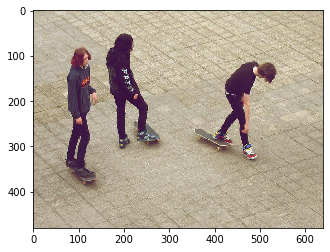

In [3]:
file_id = 21540#6512#11#4926#4499
df = pd.read_csv(os.path.join(data_path,f'refCOCO/train/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/train/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/train/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)
rel_df = pd.read_csv(os.path.join(data_path,f'refCOCO/train/rel_tables/rel_{file_id}.tsv'), encoding='utf-8',sep='\t').fillna(0)
df


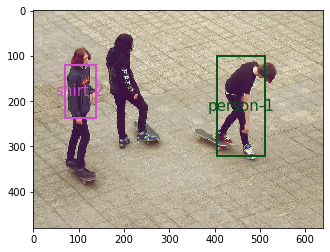

In [5]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[20:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax,_ = draw_box_obj(name,x,y,w,h,img,ax)

['CENTER SCATEBOARDER', 'person in middle', 'the person in the middle']


(<matplotlib.axes._subplots.AxesSubplot at 0x7f04fc10ff10>,
 array([0.19309125, 0.25048116, 0.65210961]))

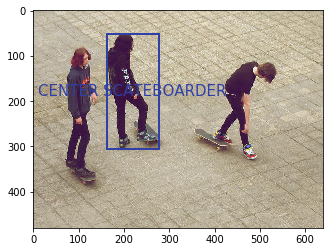

In [6]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [8]:
objects = df[['box_alias','salience', 'x1','y1','w', 'h']]
print(objects)

       box_alias  salience          x1          y1           w           h
0   skateboard-1  0.016146  348.618805  255.333084   85.134796   58.260208
1        pants-1  0.020588   71.796127  241.726807   59.392426  106.491211
2         shoe-1  0.002601  397.779785  267.687531   37.105988   21.534210
3        woman-1  0.066280   64.291809   79.759079   85.883865  237.077408
4   skateboard-2  0.013312   73.718437  328.398132   72.622307   56.311249
5         girl-1  0.080737  155.507553   68.652100  106.072006  233.826660
6        shirt-1  0.018459  423.136597  111.826744   75.149445   75.456276
7         shoe-2  0.005281  458.361328  293.366241   41.026459   39.543549
8        woman-2  0.067240  154.727951   55.673347  101.647446  203.212616
9      sweater-1  0.026246   68.873558  121.252144   69.775169  115.552971
10         man-1  0.203533  375.034302   43.618233  187.781128  332.969818
11       woman-3  0.084124  395.884338  115.657845  141.327209  182.859619
12      people-1  0.38315

In [9]:
objs_by_type = defaultdict(list)
for _, row in objects.iterrows():
    obj = row.iloc[0]
    sal = row.iloc[1]
    x1,y1 = row.iloc[2], row.iloc[3]
    w,h = row.iloc[4], row.iloc[5]
    obj_type = obj[:obj.index('-')]
    objs_by_type[obj_type].append(obj)
print(objs_by_type)

defaultdict(<class 'list'>, {'skateboard': ['skateboard-1', 'skateboard-2'], 'pants': ['pants-1'], 'shoe': ['shoe-1', 'shoe-2', 'shoe-3'], 'woman': ['woman-1', 'woman-2', 'woman-3'], 'girl': ['girl-1', 'girl-2', 'girl-3'], 'shirt': ['shirt-1', 'shirt-2'], 'sweater': ['sweater-1'], 'man': ['man-1'], 'people': ['people-1'], 'pavement': ['pavement-1'], 'tshirt': ['tshirt-1'], 'ground': ['ground-1'], 'boy': ['boy-1'], 'person': ['person-1']})


In [10]:
objects[objects['box_alias']=='girl-1']

,box_alias,salience,x1,y1,w,h
5,girl-1,0.080737,155.507553,68.6521,106.072006,233.82666


In [11]:
rel_df

,rel_alias,image_id,ann_id,ref_id,REL___background__,REL_above,REL_across,REL_against,REL_along,REL_and,...,REL_standing on,REL_to,REL_under,REL_using,REL_walking in,REL_walking on,REL_watching,REL_wearing,REL_wears,REL_with
0,"(woman-3,skateboard-1)",138114,2204881,38087,0.209437,3.753688e-02,1.148943e-04,1.196133e-04,9.300177e-05,0.000279,...,0.035809,7.806517e-05,1.623789e-04,3.923500e-03,0.000241,0.000478,1.886981e-04,0.013093,0.003101,0.006662
1,"(girl-2,skateboard-1)",138114,2204881,38087,0.224144,3.690263e-02,1.145853e-04,1.192792e-04,9.328517e-05,0.000278,...,0.033927,7.949429e-05,1.652610e-04,3.615907e-03,0.000237,0.000457,1.882741e-04,0.013250,0.003097,0.006661
2,"(person-1,skateboard-1)",138114,2204881,38087,0.211820,3.640791e-02,1.156390e-04,1.210769e-04,9.509973e-05,0.000279,...,0.035202,7.859646e-05,1.690046e-04,3.985579e-03,0.000247,0.000520,1.892579e-04,0.011459,0.002772,0.006496
3,"(person-1,shirt-1)",138114,2204881,38087,0.310607,1.238594e-04,4.164514e-05,3.588697e-05,4.185433e-05,0.000114,...,0.000191,4.984237e-05,5.610276e-05,6.197402e-05,0.000058,0.000055,6.245967e-05,0.507003,0.053318,0.010452
4,"(woman-3,shirt-1)",138114,2204881,38087,0.298451,1.263560e-04,4.103666e-05,3.522943e-05,4.057679e-05,0.000113,...,0.000188,4.894416e-05,5.631993e-05,6.072940e-05,0.000055,0.000051,6.132706e-05,0.516568,0.054199,0.010359
5,"(man-1,skateboard-1)",138114,2204881,38087,0.207662,3.797764e-02,1.057232e-04,1.123980e-04,8.843240e-05,0.000253,...,0.032868,7.290461e-05,1.406402e-04,3.285228e-03,0.000231,0.000472,1.735272e-04,0.007713,0.002026,0.005797
6,"(girl-2,shirt-1)",138114,2204881,38087,0.318973,1.252167e-04,4.140562e-05,3.566509e-05,4.148879e-05,0.000113,...,0.000185,5.013636e-05,5.713398e-05,5.810908e-05,0.000056,0.000051,6.227473e-05,0.501664,0.052579,0.010102
7,"(man-1,shirt-1)",138114,2204881,38087,0.312799,1.145099e-04,4.022728e-05,3.478971e-05,4.131251e-05,0.000109,...,0.000203,4.905116e-05,4.517180e-05,5.701670e-05,0.000060,0.000058,6.108336e-05,0.502374,0.054088,0.010441
8,"(boy-1,skateboard-1)",138114,2204881,38087,0.219672,3.650106e-02,1.102055e-04,1.163530e-04,9.437453e-05,0.000259,...,0.031665,7.459982e-05,1.399902e-04,3.178892e-03,0.000242,0.000514,1.797723e-04,0.007224,0.001892,0.005487
9,"(boy-1,shirt-1)",138114,2204881,38087,0.322413,1.128784e-04,4.247499e-05,3.638245e-05,4.459759e-05,0.000111,...,0.000215,5.088533e-05,4.312537e-05,5.941960e-05,0.000066,0.000067,6.375461e-05,0.495124,0.053359,0.010331


In [12]:
r = rel_df.iloc[13].drop(['rel_alias','image_id', 'ann_id', 'ref_id', 'REL___background__'])
print(r)

REL_above           1.48874e-05
REL_across          5.61965e-07
REL_against         7.34654e-07
REL_along           1.15634e-06
REL_and             4.37076e-06
REL_at              0.000102432
REL_attached to     3.81998e-07
REL_behind          1.71601e-05
REL_belonging to    1.51111e-07
REL_between         7.37045e-07
REL_carrying        5.29774e-07
REL_covered in      6.17342e-07
REL_covering        4.52939e-07
REL_eating          1.06933e-06
REL_flying in       2.44909e-07
REL_for              4.2253e-07
REL_from            2.53248e-07
REL_growing on       3.9676e-07
REL_hanging from    1.27519e-06
REL_has             8.53088e-05
REL_holding         1.13018e-05
REL_in              1.10007e-05
REL_in front of      3.5511e-05
REL_laying on       4.25984e-07
REL_looking at      1.45861e-05
REL_lying on        2.22968e-07
REL_made of          2.3478e-07
REL_mounted on      3.05509e-07
REL_near            0.000400737
REL_of              1.88582e-06
REL_on              0.000114971
REL_on b

In [13]:
relations = defaultdict(list)
for i in range(len(rel_df)):
    r = rel_df.iloc[i].drop(['rel_alias','image_id', 'ann_id', 'ref_id', 'REL___background__'])
    relation = r.astype(float).idxmax(axis=1)
    relation_likelihood = r.astype(float).max()
    relation = relation[relation.index("_")+1:]
    rel_alias = rel_df['rel_alias'][i]
    obj_1, obj_2 = rel_alias[1:len(rel_alias)-1].split(',')
    relations[obj_1].append([relation, obj_2, relation_likelihood])
for rel in relations:
    print(rel, relations[rel])
for rel in relations:
    relations[rel].sort(key=lambda x: x[2], reverse=True)
print('$$$$$$$$$$$$$$$$$$$$$$$')
for rel in relations:
    print(rel, relations[rel])    

woman-3 [['on', 'skateboard-1', 0.5196355581283569], ['wearing', 'shirt-1', 0.5165680646896362], ['near', 'skateboard-2', 0.0004037516773678362], ['near', 'shoe-3', 0.0003911300154868513], ['near', 'shirt-2', 0.0004563656984828413], ['wearing', 'tshirt-1', 0.4696934223175049], ['near', 'pants-1', 0.00026172472280450165], ['wearing', 'shoe-2', 0.371614545583725], ['on', 'ground-1', 0.12760987877845764], ['near', 'sweater-1', 0.0006339689716696738], ['on', 'shoe-1', 0.3059640824794769]]
girl-2 [['on', 'skateboard-1', 0.5147272348403931], ['wearing', 'shirt-1', 0.5016641020774841], ['near', 'shoe-3', 0.00040073678246699284], ['near', 'skateboard-2', 0.0004119971417821944], ['near', 'shirt-2', 0.00044338635052554315], ['wearing', 'tshirt-1', 0.4580414593219757], ['near', 'pants-1', 0.0002669906243681908], ['wearing', 'shoe-2', 0.3639206886291504], ['on', 'ground-1', 0.12180519104003905], ['near', 'sweater-1', 0.0006095563294366003], ['on', 'shoe-1', 0.2767811715602875]]
person-1 [['on', 's

### EXTRACTING RELATIONS FROM SCENEGRAPH ####

In [14]:
relations = []
for i in range(40000): # 5000 for test set and 40000 for training set
    file_id = i#2869#4926#4499
    rel_df = pd.read_csv(os.path.join(data_path,f'refCOCO/train/rel_tables/rel_{file_id}.tsv'), encoding='utf-8',sep='\t').fillna(0)
    file_relations = defaultdict(list)
    for j in range(len(rel_df)):
        r = rel_df.iloc[j].drop(['rel_alias','image_id', 'ann_id', 'ref_id', 'REL___background__'])
        rel_likelihood = r.astype(float).max()
        relation = r.astype(float).idxmax(axis=1)
        relation = relation[relation.index("_")+1:]
        rel_alias = rel_df['rel_alias'][j]
        obj_1, obj_2 = rel_alias[1:len(rel_alias)-1].split(',')
        file_relations[obj_1].append([relation, obj_2, rel_likelihood])
    for subject in file_relations:
        file_relations[subject].sort(key=lambda elem: elem[2], reverse=True)
    relations.append(file_relations)
    if i % 500 == 0:
        print(f'finished {i} files')
    
np.save(f'./train_relation_extraction.npy',relations)

finished 0 files
finished 500 files
finished 1000 files
finished 1500 files
finished 2000 files
finished 2500 files
finished 3000 files
finished 3500 files
finished 4000 files
finished 4500 files
finished 5000 files
finished 5500 files
finished 6000 files
finished 6500 files
finished 7000 files
finished 7500 files
finished 8000 files
finished 8500 files
finished 9000 files
finished 9500 files
finished 10000 files
finished 10500 files
finished 11000 files
finished 11500 files
finished 12000 files
finished 12500 files
finished 13000 files
finished 13500 files
finished 14000 files
finished 14500 files
finished 15000 files
finished 15500 files
finished 16000 files
finished 16500 files
finished 17000 files
finished 17500 files
finished 18000 files
finished 18500 files
finished 19000 files
finished 19500 files
finished 20000 files
finished 20500 files
finished 21000 files
finished 21500 files
finished 22000 files
finished 22500 files
finished 23000 files
finished 23500 files
finished 24000 f

In [7]:
rel_load = np.load(f'./train_relation_extraction.npy', allow_pickle=True)
print(len(rel_load))

40000


In [8]:
rel_load[0]

defaultdict(list,
            {'dirt-1': [['has', 'tail-1', 0.5715891718864441],
              ['has', 'legs-1', 0.5046933889389038],
              ['of', 'zebra-1', 0.30811890959739685],
              ['has', 'zebra-2', 0.2866024076938629],
              ['has', 'ground-1', 0.27345314621925354],
              ['has', 'leg-1', 0.2408453226089477]],
             'fence-1': [['has', 'leg-1', 0.470076709985733],
              ['has', 'tail-1', 0.3047412633895874],
              ['has', 'ground-1', 0.2003248929977417],
              ['of', 'zebra-1', 0.18981964886188507],
              ['of', 'dirt-1', 0.12027902156114577],
              ['behind', 'leaves-1', 0.10358780622482301]],
             'ground-1': [['has', 'tail-1', 0.6110052466392517],
              ['has', 'legs-1', 0.5254850387573242],
              ['has', 'leg-1', 0.4545235335826874],
              ['has', 'zebra-2', 0.3699359297752381],
              ['of', 'zebra-1', 0.34436360001564026],
              ['of', 'dirt-1', 0.1

### CREATE SPATIAL RELATIONS ###
- Relation between (different type of objects: [dog] next to [cat])
- Relation among (same type: [cat] on the left)
- Ordinal relation

In [13]:
RelationBetween = ['next to']
RelationAmong = ['the left', 'the right', 'the middle', 'the biggest', 'the bigger', 'the smallest', 'the smaller']
RelationOrdinal = []

#### Find relation among #####

# of woman: 3
  box_alias  salience         x1         y1          w           h
3   woman-1   0.06628  64.291809  79.759079  85.883865  237.077408
  box_alias  salience          x1         y1           w           h
8   woman-2   0.06724  154.727951  55.673347  101.647446  203.212616
   box_alias  salience          x1          y1           w           h
11   woman-3  0.084124  395.884338  115.657845  141.327209  182.859619


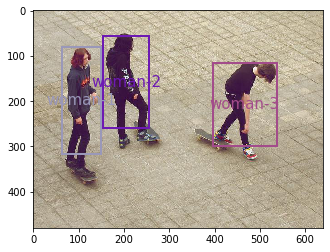

In [15]:
target = 'woman'
targeted_type = objs_by_type[target]
print(f'# of {target}: {len(targeted_type)}')
fig,ax = plt.subplots(1)
ax.imshow(image)

for i, obj in enumerate(targeted_type):
    print(objects[objects['box_alias']==obj])
    name,salience, x,y,w,h = list(objects[objects['box_alias']==obj].iloc[0,:])
#     print(name,salience, x,y,w,h)
    ax, _ = draw_box_obj(name,x,y,w,h,img,ax)
    if len(targeted_type) == 2:
        other_obj = targeted_type[(i+1)%2]
        other_name, other_salience, other_x,other_y,other_w, other_h = list(objects[objects['box_alias']==other_obj].iloc[0,:])
        if x < other_x:
            print(f"the left {obj}")
        elif x > other_x:
            print(f"the right {obj}")
        print(w*h, 1.1 * other_w * other_h)
        if w*h >= 1.1 * other_w * other_h:
            print(f"the bigger {obj}")
        elif w*h <= 0.9 * other_w * other_h:
            print(f"the smaller {obj}")

#### Find relation between #####

# of bike: 2
  box_alias  salience          x1         y1           w           h
0    bike-1  0.255417  135.169617  104.14151  270.829773  257.727753
the left bike-1
69800.34874253908 45931.261703238626
the bigger bike-1
   box_alias  salience        x1         y1         w           h
13    bike-2  0.152795  480.4198  10.642651  159.5802  261.659607
the right bike-2
41755.69245748966 76780.38361679298
the smaller bike-2


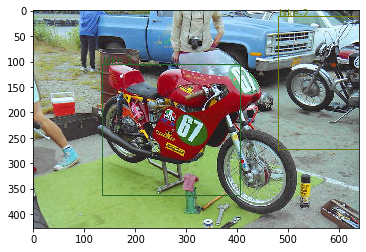

In [11]:
target = 'bike'
targeted_type = objs_by_type[target]
print(f'# of {target}: {len(targeted_type)}')
fig,ax = plt.subplots(1)
ax.imshow(image)

for i, obj in enumerate(targeted_type):
    print(objects[objects['box_alias']==obj])
    name,salience, x,y,w,h = list(objects[objects['box_alias']==obj].iloc[0,:])
#     print(name,salience, x,y,w,h)
    ax = draw_box_obj(name,x,y,w,h,img,ax)
    if len(targeted_type) == 2:
        other_obj = targeted_type[(i+1)%2]
        other_name, other_salience, other_x,other_y,other_w, other_h = list(objects[objects['box_alias']==other_obj].iloc[0,:])
        if x < other_x:
            print(f"the left {obj}")
        elif x > other_x:
            print(f"the right {obj}")
        print(w*h, 1.1 * other_w * other_h)
        if w*h >= 1.1 * other_w * other_h:
            print(f"the bigger {obj}")
        elif w*h <= 0.9 * other_w * other_h:
            print(f"the smaller {obj}")

In [90]:
objects.sort_values(by=['salience'], ascending=False)

,box_alias,salience,x1,y1,w,h
8,field-1,0.391792,87.593712,300.009674,379.029694,310.266937
20,men-1,0.384438,72.527954,26.807831,392.476349,294.012329
19,players-1,0.361956,75.261261,40.359257,319.216949,340.347961
11,grass-1,0.349943,91.228577,361.951080,377.771423,278.048920
10,player-1,0.347064,201.038696,61.804962,217.029816,480.001373
13,stands-1,0.249016,0.000000,0.000000,464.809296,160.807404
5,man-1,0.245132,23.691618,0.000000,200.066422,367.772034
9,man-2,0.236180,242.936142,0.860609,222.728409,318.288544
0,pants-1,0.100561,76.446915,296.435944,117.953827,255.900604
1,pants-2,0.097334,265.570923,305.282318,154.375763,189.251251


In [12]:
print(objs_by_type.keys())

dict_keys(['bike', 'bottle', 'van', 'shoe', 'truck', 'wheel', 'motorcycle', 'person', 'ground', 'jacket', 'shirt', 'tire', 'leg', 'grass', 'man', 'pants', 'woman', 'wheels', 'chest', 'car', 'vehicle', 'case', 'road', 'cooler'])


In [107]:
def distance(x1,y1,x2,y2):
    return sqrt((x1-x2)**2 + (y1-y2)**2)

In [17]:
spatial_terms = ['left', 'right', 'top','bottom', 'under', 'above']
imgs_with_spatial_relations = []
rel_count = 0
for i in range(40000):
    file_id = i#2869#4926#4499
#     rel_df = pd.read_csv(os.path.join(data_path,f'refCOCO/rel_tables/rel_{file_id}.tsv'), encoding='utf-8',sep='\t').fillna(0)
#     file_relations = defaultdict(list)
#     for j in range(len(rel_df)):
#         r = rel_df.iloc[j].drop(['rel_alias','image_id', 'ann_id', 'ref_id', 'REL___background__'])
#         rel_likelihood = r.astype(float).max()
#         relation = r.astype(float).idxmax(axis=1)
#         relation = relation[relation.index("_")+1:]
#         rel_alias = rel_df['rel_alias'][j]
#         obj_1, obj_2 = rel_alias[1:len(rel_alias)-1].split(',')
#         file_relations[obj_1].append([relation, obj_2, rel_likelihood])
#     for subject in file_relations:
#         file_relations[subject].sort(key=lambda elem: elem[2], reverse=True)
#     relations.append(file_relations)
    
    with open(os.path.join(data_path,f'refCOCO/train/labels/lab_{file_id}.json')) as json_file:
        label = json.load(json_file)
    sentences = label['ref_sents']
    has_spatial_relation = any([any([term in sentence for term in spatial_terms]) for sentence in sentences])
    if has_spatial_relation:
        rel_count += 1
        imgs_with_spatial_relations.append(i)
    
    if i % 1000 == 0:
        print(f'finished {i} files')
    
print(rel_count)

finished 0 files
finished 1000 files
finished 2000 files
finished 3000 files
finished 4000 files
finished 5000 files
finished 6000 files
finished 7000 files
finished 8000 files
finished 9000 files
finished 10000 files
finished 11000 files
finished 12000 files
finished 13000 files
finished 14000 files
finished 15000 files
finished 16000 files
finished 17000 files
finished 18000 files
finished 19000 files
finished 20000 files
finished 21000 files
finished 22000 files
finished 23000 files
finished 24000 files
finished 25000 files
finished 26000 files
finished 27000 files
finished 28000 files
finished 29000 files
finished 30000 files
finished 31000 files
finished 32000 files
finished 33000 files
finished 34000 files
finished 35000 files
finished 36000 files
finished 37000 files
finished 38000 files
finished 39000 files
27264


In [21]:
from nltk.parse.corenlp import CoreNLPParser
parser = CoreNLPParser()

In [25]:
sentences = label['ref_sents']

In [31]:
parse = next(parser.raw_parse(sentences[2]))
print(sentences[2])
print(parse)

left woman in red coat
(ROOT
  (NP (NP (JJ left) (NN woman)) (PP (IN in) (NP (JJ red) (NN coat)))))


In [108]:
def row_objs(objects, target, targeted_type):
    name,salience, x,y,w,h = list(objects[objects['box_alias']==target].iloc[0,:])
    row = []
    for obj in targeted_type:
        other_name, other_salience, other_x,other_y,other_w, other_h = list(objects[objects['box_alias']==obj].iloc[0,:])
        if y <= other_y <= y + h or other_y <= y <= other_y+ other_h:
            row.append([obj, other_x, other_y])
    row.sort(key=lambda x: x[1])
    return [item[0] for item in row]

In [7]:
target = 'woman'
targeted_type = objs_by_type[target]
print(f'# of {target}: {len(targeted_type)}')
fig,ax = plt.subplots(1)
ax.imshow(image)

for i, obj in enumerate(targeted_type):
    name,salience, x,y,w,h = list(objects[objects['box_alias']==obj].iloc[0,:])
#     print(name,salience, x,y,w,h)
    ax = draw_box_obj(name,x,y,w,h,img,ax)
    if len(targeted_type) == 2:
        other_obj = targeted_type[(i+1)%2]
        other_name, other_salience, other_x,other_y,other_w, other_h = list(objects[objects['box_alias']==other_obj].iloc[0,:])
        if x < other_x:
            print(f"the left {obj}")
        elif x > other_x:
            print(f"the right {obj}")
        print(w*h, 1.1 * other_w * other_h)
        if w*h >= 1.1 * other_w * other_h:
            print(f"the bigger {obj}")
        elif w*h <= 0.9 * other_w * other_h:
            print(f"the smaller {obj}")
    elif len(targeted_type) >= 3:
        row_of_objs = row_objs(objects, obj, targeted_type)
        print(obj, row_of_objs)
        target_idx = row_of_objs.index(obj)
        
        if target_idx < len(row_of_objs)/2 and target_idx <= 3:
            print(f"the {target_idx+1} {target} from left")
        elif target_idx >= len(row_of_objs)/2 and target_idx >=  len(row_of_objs) - 3:
            print(f"the {len(row_of_objs)- target_idx} {target} from right")

NameError: name 'objs_by_type' is not defined

In [47]:
matplotlib.rcParams['figure.dpi'] = 140